In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm
import scipy
from skimage.transform import resize

In [2]:
count=0
x_data=[]
y_data=[]
path="/kaggle/input/farsiu-2014/AMD 2/AMD 2"
for file in tqdm(os.listdir(path)):
    if count >= 2000:
        break
    mat=scipy.io.loadmat(os.path.join(path,file))
    images=mat['images']
    layers1 = mat['layerMaps']
    # img=img.reshape(256,256,3)
    x, y, nimages = images.shape
    step = 4
    my_dpi=200
    ini = int(y / step)
    fin = int(ini * (step - 1))
    thr = fin - ini - 1
    for i in range(100):
        curr_im = images[:, ini:fin, i]
        curr_l1_0 = layers1[i, ini:fin, 0]
        curr_l1_1 = layers1[i, ini:fin, 1]
        curr_l1_2 = layers1[i, ini:fin, 2]
        cn0 = np.count_nonzero(~np.isnan(curr_l1_0))
        cn1 = np.count_nonzero(~np.isnan(curr_l1_1))
        cn2 = np.count_nonzero(~np.isnan(curr_l1_2))
        # print(img.shape)
        flag = ((cn0 > thr) and (cn1 > thr) and (cn2 > thr))
        if flag:
            if count >= 2000:
                break
            fig = plt.figure(frameon=False)
            fig.set_size_inches(y / my_dpi, x / my_dpi)
            ax = plt.Axes(fig, [0., 0., 1., 1.])
            ax.set_axis_off()
            fig.add_axes(ax)
            ax.imshow(curr_im, aspect='auto', cmap='gray')
            fig.canvas.draw()
            image=np.frombuffer(fig.canvas.tostring_rgb(),dtype=np.uint8)
            image=image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            image=resize(image,(284,284,1))
            image=np.transpose(image,(2,0,1))
            x_data+=[image]
            fig=plt.figure(frameon=False)
            fig.set_size_inches(y / my_dpi, x / my_dpi)
            ax = plt.Axes(fig, [0., 0., 1., 1.])
            ax.set_axis_off()
            fig.add_axes(ax)
            black = np.zeros([x, fin - ini], dtype=curr_im.dtype)
            ax.imshow(black, aspect='auto', cmap='gray')
            ax.plot(curr_l1_0, 'w', aa=False   , linewidth=0.25)
            ax.plot(curr_l1_1, 'w', aa=False, linewidth=0.25)
            ax.plot(curr_l1_2, 'w', aa=False, linewidth=0.25)
            fig.canvas.draw()
            mask=np.frombuffer(fig.canvas.tostring_rgb(),dtype=np.uint8)
            mask=mask.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            mask=resize(mask,(196,196,1))
            mask=np.transpose(mask,(2,0,1))
            y_data+=[mask]
            plt.close('all')
            count+=1
x_train, y_train = np.array(x_data[:1600]), np.array(y_data[:1600])
x_val, y_val = np.array(x_data[1600:1800]), np.array(y_data[1600:1800])
x_test, y_test = np.array(x_data[1800:]), np.array(y_data[1800:])

  0%|          | 0/269 [00:00<?, ?it/s]

In [3]:
x_train.shape

(1600, 1, 284, 284)

In [4]:
y_train.shape

(1600, 1, 196, 196)

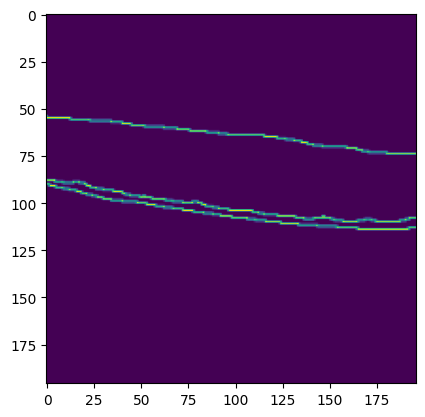

In [5]:
plt.imshow(np.transpose(y_train[0],(1,2,0)))

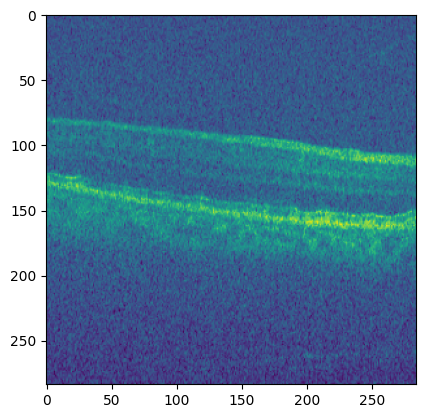

In [6]:
plt.imshow(np.transpose(x_train[0],(1,2,0)))

In [7]:
from _pickle import Pickler

In [8]:
file = open("x_train.pickle","wb")
Pickler(file).dump(x_train)

In [9]:
file = open("y_train.pickle","wb")
Pickler(file).dump(y_train)

In [10]:
file = open("x_val.pickle","wb")
Pickler(file).dump(x_val)

In [11]:
file = open("y_val.pickle","wb")
Pickler(file).dump(y_val)

In [12]:
file = open("x_test.pickle","wb")
Pickler(file).dump(x_test)

In [13]:
file = open("y_test.pickle","wb")
Pickler(file).dump(y_test)

In [14]:
np.save("x_train.npy",x_train)
np.save("y_train.npy",y_train)

np.save("x_val.npy",x_val)
np.save("y_val.npy",y_val)

np.save("x_test.npy",x_test)
np.save("y_test.npy",y_test)

In [15]:
from multiprocessing import Process,Queue
def fun(q):
    q.put(0)

qu=Queue()
p1=Process(target=fun,args=(qu,))
p2=Process(target=fun,args=(qu,))
p3=Process(target=fun,args=(qu,))
p4=Process(target=fun,args=(qu,))
p1.start()
p2.start()
p3.start()
p4.start()
p1.join()
p2.join()
p3.join()
p4.join()
print(qu)

In [16]:
while not qu.empty():
    print(qu.get())

0
0
0
0
